# Sentiment analytics

### Environment

In [1]:
from run import *

The first thing to do is splitting up the corpora in the reference year.</br>
So, in order to do that, we will iterate over the corpora and remove the texts written after the year 1880.

In [2]:
delete_authors_texts = set()
f_authors_set = set(f_authors_texts)
for url in f_authors_set:
    if int(url[21:25]) > 1880:
        delete_authors_texts.add(url)
f_authors_texts_post = f_authors_set - delete_authors_texts    
f_authors_texts = list(f_authors_texts_post)
quickSort(f_authors_texts, 0, len(f_authors_texts)-1)

# male authors texts post 1880
delete_authors_texts = set()
m_authors_set = set(m_authors_texts)
for url in m_authors_set:
    if int(url[21:25]) > 1880:
        delete_authors_texts.add(url)
m_authors_texts_post = m_authors_set - delete_authors_texts    
m_authors_texts = list(m_authors_texts_post)
quickSort(m_authors_texts, 0, len(m_authors_texts)-1)

### 1) Female authors corpus

Let's start by analyzing the <i>corpus of female authors</i>.

#### 1.1) Sentiment analysis

##### 1.1.1) Characters extraction

First of all, we need to extract all the characters from the analyzed corpora.</br>
The extracted characters will be stored inside a dictionary.

In [3]:
f_proper_nouns_dict = {}
for url in tqdm(f_authors_texts):
    f_proper_nouns_dict[url] = {}
    text = text_reader(url)
    list_of_sentences = syntok_list_of_sentences(text)
    for sentence in list_of_sentences:
            for word in word_tokenization(sentence, True, False)[1:]:
                is_it_proper(word, f_proper_nouns_dict[url])

100%|██████████| 46/46 [00:19<00:00,  2.37it/s]


The extraction is based on all the capitalized words that aren't part of the words which commonly appear capitalized inside texts (such as geographical locations, religious words, exclamations, and so on...)

In [4]:
f_characters = set()
for url in f_proper_nouns_dict:
    for word in f_proper_nouns_dict[url]:
        if 'upper' in f_proper_nouns_dict[url][word] and 'lower' not in f_proper_nouns_dict[url][word]:
            if word not in capital_not_names:
                f_characters.add(word.lower())
                f_characters.add(word.capitalize())

Now, we add manually all these proper names which have been extracted as common words.

In [5]:
f_characters.add('isobel')
f_characters.add('Isobel')
f_characters.add('agnes')
f_characters.add('Agnes')
f_characters.add('mary')
f_characters.add('Mary')
f_characters.add('flo')
f_characters.add('Flo')
f_characters.add('jan')
f_characters.add('Jan')
f_characters.add('john')
f_characters.add('John')

----------

##### 1.1.2) Raw scores

At this point, we want to analyze the corpus thanks to the functions contained in the document for the [gender classification of sentences](functions/sentiment_functions.py).</br>
In particular, we will call the main function of this file, that is <span style="color:#89FC00">gender_analysis</span>, on each text of our "female authors corpus".

In [6]:
for url in tqdm(f_authors_texts):
    text = text_reader(url)
    gender_analysis(text, f_sent_dict, f_sentence_counter, f_word_counter, female_authors_raw_count, f_word_freq, male_words, female_words)

100%|██████████| 46/46 [00:48<00:00,  1.06s/it]


Thanks to this script we have analyzed, gendered and given a polarity score as well as a qualitative sentiment label to the sentences of each one of the texts contained inside the reference corpus and we have fulfilled the dictionaries related to such corpus.

As a last step of this first part of the process, we will first print out the differences between gendered and not-gendered sentences in terms of raw percentages of gendered sentences. </br>
Then, by following a statistical analysis of our sentences in this corpus, we will also try to determine if the differences between the way in which female authors deal with male and female sentences is significant. In particular, what we aim to do is to determine wether the mean of the sentences related sentiment scores are significantly different.

In [7]:
print ('%.1f%% gendered.' % (100*(f_sentence_counter['male'] + f_sentence_counter['female'])/
                           (f_sentence_counter['male'] + f_sentence_counter['female'] + f_sentence_counter['mainly_female'] + 
                           f_sentence_counter['mainly_male'] + f_sentence_counter['both'] + f_sentence_counter['none'])))
print ('%s sentences about men.' % f_sentence_counter['male'])
print ('%s sentences about women.' % f_sentence_counter['female'])
print ('%.1f sentences about men for each sentence about women.' % (f_sentence_counter['male']/f_sentence_counter['female']))

45.1% gendered.
33466 sentences about men.
21740 sentences about women.
1.5 sentences about men for each sentence about women.


-------

#### 1.2) Statystical analysis

Once determined some raw percentages and a raw count of the sentences contained in the female authors corpus, we will compute a statistical analysis regarding the means of the scores for female and male sentences inside this corpus.

<b><u>Data extraction</b></u>

As a first step, we need to create some lists in which we will store the scores and the sentiment labels.

In [8]:
f_f_labels = list()
f_m_labels = list()
f_f_scores = list()
f_m_scores = list()

Now, we extract the scores that have been previously saved inside the output dictionary of the gender analysis and we store them in the above defined lists.

In [9]:
for sentence in f_sent_dict:
    if f_sent_dict[sentence]["gender"] == "female":
        f_f_scores.append(f_sent_dict[sentence]["score"])
        f_f_labels.append(f_sent_dict[sentence]["polarity"])
    elif f_sent_dict[sentence]["gender"] == "male":
        f_m_scores.append(f_sent_dict[sentence]["score"])
        f_m_labels.append(f_sent_dict[sentence]["polarity"])

-----

<b><u>Raw statistics</u></b>

In [10]:
pos = 0
neg = 0
neu = 0
for pol in f_f_labels:
    if pol == "POS":
        pos += 1
    elif pol == "NEG":
        neg += 1
    else:
        neu += 1
print("For what concerns the", pos+neg+neu,"female gendered sentences written by female authors we have these results:")
print("\n")
print("The number of positive sentences is:", pos)
print("The number of negative sentences is:", neg)
print("The number of neutral sentences is:", neu)

For what concerns the 21552 female gendered sentences written by female authors we have these results:


The number of positive sentences is: 9595
The number of negative sentences is: 5378
The number of neutral sentences is: 6579


In [11]:
pos = 0
neg = 0
neu = 0
for pol in f_m_labels:
    if pol == "POS":
        pos += 1
    elif pol == "NEG":
        neg += 1
    else:
        neu += 1
print("For what concerns the", pos+neg+neu,"male gendered sentences written by female authors we have these results:")
print("\n")
print("The number of positive sentences is:", pos)
print("The number of negative sentences is:", neg)
print("The number of neutral sentences is:", neu)

For what concerns the 33197 male gendered sentences written by female authors we have these results:


The number of positive sentences is: 14881
The number of negative sentences is: 7833
The number of neutral sentences is: 10483


-----

<b><u>Sample building</u></b>

Seen that the aim of the analysis is to see wether a significant difference between the means of the two different sets of score (for male and female related sentences) exists, we will try to perform a <span style="color:#EE6352"><i>t-test for independent samples</i></span>.</br>
In order to be able to perform such statistical test, we first need to create two equally large samples. The dimension of the sample will be of 1500 scores each (number decided by looking at theoverall counts of sentences).

The sampling operation is computed for both female and male related sentences that has a positive or negative score. Neutral sentences will not be considered in this first analysis because of the fact that we do not think that their values should be taken into account in order to perform an analysis that tries to higlight a possible difference between the average score of female and male sentences.</br>
Behind this choice there is the fact that by analyzing some of the sentences extracted, we noticed that neutral sentences are not essential for the analysis because many times are referred to landscapes descriptions made by female or male characters. 

<b>Data preparation</b>

First of all, in order to prepare the stratified sampling operation we should remove all the neutral scores and labels from our lists.</br>
With the output of this first operation we create a dictionary representing the population to sample, that will be given as input to the <span style="color:#EDAE49">stratified_random_sampling function</span> that can be found in the [analytics functions file]("functions/analytics_functions.py).

In [12]:
# Remove neutral scores in female sentences
try:
    while True:
        f_f_scores.remove(0.0)
except ValueError:
    pass
# Remove neutral labels in female sentences
try:
    while True:
        f_f_labels.remove('NEU')
except ValueError:
    pass
# Remove neutral scores in male sentences
try:
    while True:
        f_m_scores.remove(0.0)
except ValueError:
    pass
# Remove neutral labels in male sentences
try:
    while True:
        f_m_labels.remove('NEU')
except ValueError:
    pass

Once the remove operation has been successfully accomplished, as said before, we create a dictionary to represent the entire population:

In [13]:
# Female sentences population dictionary
f_f_population = {
    "scores":f_f_scores,
    "labels":f_f_labels
}
# Male sentences population dictionary
f_m_population = {
    "scores":f_m_scores,
    "labels":f_m_labels
} 

Seen that we need (for the visualization) to store our data inside CSV files, we will create a dataframe object, add columns (representing samples), and finally save it as csv file.

In [14]:
pre_df = DataFrame()

<b>SRS (Stratified Random Sampling) operation</b>

In [15]:
f_samples = stratified_random_sampling([f_f_population,f_m_population], sample_size(len(f_f_population['scores'])+len(f_m_population['scores'])))
f_f_sample = f_samples[0]
f_m_sample = f_samples[1]

In [16]:
pre_df = pd.concat([pre_df,DataFrame({"ff_sample":f_f_sample})], axis=1)
pre_df = pd.concat([pre_df,DataFrame({"fm_sample":f_m_sample})], axis=1)

-----

<b><u>T-Test assumptions check</u></b>

Once we have our samples, we need to check for the assumptions of the <span style="color:#EE6352"><i>t-test</i></span>:</br>
- Continuous or ordinal scale of measurement: this one is easily confirmed by simply looking at the scores;
- Data must be collected from a representative, randomly selected and reasonably large sample size of the total population: again, this has yet been accomlished by the random sampling performed in the previous step;
- Data must follow the rules of a normal distribution (we will consider the standard threshold of 5%): in order to check for this assumption we wrote the <span style="color:#EDAE49">check_distribution</span> function that you can find in the [analytics functions file](analytics_functions.py), and we will use it to analyze the distribution of data;
- Homogeneity of variance: in order to check this last assumption we will use a function contained in the [analytics functions file](analytics_functions.py) that allow us to perform an <span style="color:#EE6352"><i>F-test</i></span>.

------

<u><b>Distribution</b></u>

Starting from the sentences about female, we will check for the kind of distribution that our data follow.</br>
In particular, we look for a normal distribution in order to meaningfully compare the extracted means of the data related to positive and negative sentences inside and outside this corpora. In fact, in this first stage of the process, we will try to see if there is a statistically significant difference between the ways in which female authors deal with men and women, and how they treat gendered sentences. </br>
After that, we will compute the mean and the std of the sentences we are dealing with (only if the distribution is normal).


In order to highligth some hidden details of our data, we decided to transform them thanks to a <span style="color:#EE6352"><i>BoxCox transformation</i></span>.</br>
Finally, we will display a graph that shows the distribution of the scores.

<b>Normality assumption check for distribution of female sentences</b>

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.6677541867208415
The mean is: 0.09776295146274369
The std is: 0.28785062972379516
So, data follow a normal distribution.


(0.09776295146274369, 0.28785062972379516)

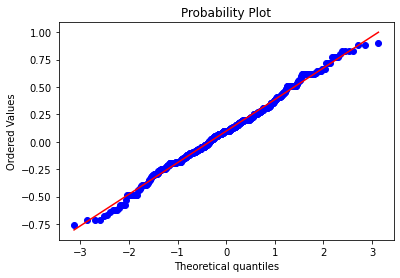

In [17]:
check_distribution(f_f_sample)

<b>Normality assumption check for distribution of male sentences</b>

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.8960372430584375
The mean is: 0.12168140817018769
The std is: 0.2990579305973559
So, data follow a normal distribution.


(0.12168140817018769, 0.2990579305973559)

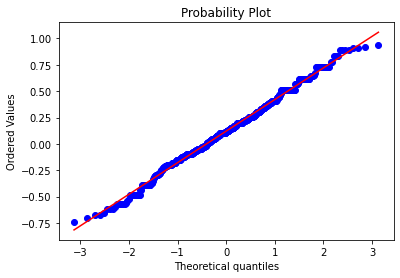

In [18]:
check_distribution(f_m_sample)

-----

<b><u>Homogeneity of variances</u></b>

We can now perform an <span style="color:#EE6352"><i>F-test</i></span> on the variances of the two samples.

In [19]:
f_test(f_f_sample, f_m_sample)

According to an F-test, we cannot reject the null hypothesis, in fact:
The F-statistics is: 1.0793847547489432
The p-value is: 0.14139195474132338
The two variances do not differ in a significant way


(1.0793847547489432, 0.14139195474132338)

------

<b><u>T-Test for independent samples</u></b>

We can now move on into testing our data in order to see wether the means of scores related to female and male gendered sentences differ in a significant way.</br>
In order to check that, we will perform a <span style="color:#EE6352"><i>t-test for independent samples</i></span> by using the <span style="color:#EDAE49">t_test_independent</span> function contained in the [analytics functions file](functions/analytics_functions.py).

In [20]:
t_test_independent(f_f_sample, f_m_sample)

According to a T-Test for independent samples we can not reject the null hypothesis, in fact:
The p-value is: 0.2964969979966527
The two means (0.09999707083580688 0.11592869759319165) do not differ in a significant way.


Ttest_indResult(statistic=-1.0443167028623765, pvalue=0.2964969979966527)

-------

#### 1.3) Emotion extraction

Finally, we can move on into seeing the emotions related data that have been extracted from our corpus.</br>
In order to do that, we will make use of the function <span style="color:#EDAE49">emotion_frequencies</span> contained in the [sentiment functions file](functions/sentiment_functions.py).

In [21]:
for url in tqdm(f_authors_texts):
    f_emotions = emotion_frequencies(url, f_emotions)
del f_emotions["anticip"]
#This dataframe is useful to plot a violin visualization of the scores
f_df_plt = pd.DataFrame(f_emotions)

f_emo_scores = list()
for emo in f_emotions:
    f_emotions[emo] = np.mean(f_emotions[emo])
    f_emo_scores.append(f_emotions[emo])
f_emotions_df = pd.DataFrame({
    'emotions':pd.Series(f_emotions.keys()),
    'score':pd.Series(f_emo_scores)
})
f_emotions_df

100%|██████████| 46/46 [00:27<00:00,  1.66it/s]


,emotions,score
0,fear,0.069138
1,anger,0.053908
2,trust,0.125146
3,surprise,0.053424
4,positive,0.210594
5,negative,0.144427
6,sadness,0.079090
7,disgust,0.042910
8,joy,0.108437
9,anticipation,0.112928


#### 1.4) Common words

Then, in order to display some statistics about the words used in gendered sentences, we first need to compute a list of the most <span style="color:#F7D6E0">common words in female and male sentences</span> that female authors tend to use inside the texts that compose the related corpus.</br>
The easiest way to do that is to retrieve our sorted <i>word_freq</i> dictionaries and to take out from these the most common words from the '<u><i>female</i></u>' and '<u><i>male</i></u>' keys.</br>
From such list we will need to take out all the words used together with a specific gender classification.

In [22]:
f_common_words=set([w for w in sorted (f_word_freq['female'],key=f_word_freq['female'].get,reverse=True)[:1000]]+
                    [w for w in sorted (f_word_freq['male'],key=f_word_freq['male'].get,reverse=True)[:1000]])
f_common_words=list(f_common_words-male_words-female_words-f_characters-animals_list-common_ws_list)

The first operation to perform, on the common_words list, is to POS-tag the words that are stored inside it.</br>
Such POS-tagged words will be placed inside a dictionary and we will print out all the different POS in order to perform a more accurate analysis of the corpus in the subsequent stages.</br>
The decision to use the universal POS-tagger is due to the fact that tagging operations in NLP are not so accurate, therefore we preferred to use a more general (so, with less definens) tagset.

In [23]:
f_tagged_words = {}
for word in pos_tagging(f_common_words, True):
    if word[1] not in f_tagged_words:
        f_tagged_words[word[1]] = []
    f_tagged_words[word[1]].append(word[0])  

Once we have our list of common words and the dictionary containing POS-tagged words, what we need to do is to compute the ratio of each one of the words for what concerns its relative presence in male and female gendered sentences.</br></br>
In this step we took into consideration the possibility that a word may appear the same amount of time for both genders but, one possible situation is when it appears 10 times, for example, in 50 male sentences and 10 times in 200 female sentences. Basically, that is the reason behind the necessity to compute its <i>relative frequency</i>.</br></br>

Finally, in order to obtain the female sentences percentage of occurrency of a specific word, we will just need to compute the inverse percentage.

In [24]:
f_male_percent = { word :
    (f_word_freq['male'].get(word,0)/f_word_counter['male'])/ 
    (f_word_freq['female'].get(word,0)/f_word_counter['female'] + 
    f_word_freq['male'].get(word,0)/f_word_counter['male']) 
    for word in f_common_words if word in f_tagged_words["NOUN"] or word in f_tagged_words["VERB"] or word in f_tagged_words["ADJ"]}

Once we have computed such male percentages, we will display our results in a tabular form.</br>
In particular, we will display the 50 most common words (if exist) for female and male contexts, that has <b>a ratio of presence higher than 3</b>, that means only those words which appear at least 2 times for a gender out of 1 time for the other.</br> 
All the words which appear just for one of the two main genders (f & m) will be displayed with a ratio = 100 by default.

<b><u>Female related common words in female authors corpus</u></b>

In [25]:
print('COMMON WORDS')
print('Female words in the female author corpus')
f_fcdf = common_words_df(f_word_freq, f_male_percent, f_female_general, False)
f_female_related_words = f_fcdf['word'].values.tolist()
f_fcdf

COMMON WORDS
Female words in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,governess,11.63,71,10,0.9208,0.0792
1,bonnet,9.18,84,15,0.9017,0.0983
2,frock,8.81,86,16,0.8980,0.1020
3,shawl,6.85,46,11,0.8727,0.1273
4,dress,6.19,268,71,0.8608,0.1392
5,lap,5.38,46,14,0.8434,0.1566
6,weeping,5.13,47,15,0.8370,0.1630
7,darling,4.66,54,19,0.8232,0.1768
8,doll,4.41,78,29,0.8151,0.1849
9,pink,4.06,52,21,0.8023,0.1977


In [72]:
f_fcdf.to_csv("assets/Visualizations datasets/Common words/pre_ff.csv")

<b><u>Male related common words in female authors corpus</u></b>

In [26]:
print('COMMON WORDS')
print('Male words in the female author corpus')
f_mcdf = common_words_df(f_word_freq, f_male_percent, f_male_general, True)
f_male_related_words = f_mcdf['word'].values.tolist()
f_mcdf

COMMON WORDS
Male words in the female author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,sword,9.97,6,98,0.0912,0.9088
1,sailor,6.89,7,79,0.1268,0.8732
2,rode,5.95,8,78,0.1439,0.8561
3,fellow,5.78,36,341,0.1475,0.8525
4,miller,4.88,13,104,0.1700,0.8300
5,lad,4.45,21,153,0.1836,0.8164
6,mill,4.40,14,101,0.1851,0.8149
7,coat,4.04,16,106,0.1983,0.8017
8,royal,3.87,12,76,0.2055,0.7945
9,boat,3.82,15,94,0.2073,0.7927


In [ ]:
f_mcdf.to_csv("assets/Visualizations datasets/Common words/pre_fm.csv")

----

### 2) Male authors corpus

The same kind of analysis based on classifications of sentences with respect to their gender will be performed in this section. This time, the focus of our analysis is the <i>male authors corpus</i>.

#### 2.1) Sentiment analysis

##### 2.1.1) Characters extraction

First of all, we need to extract all the characters from the analyzed corpora.</br>
The extracted characters will be stored inside a dictionary.

In [27]:
m_proper_nouns_dict = {}
for url in tqdm(m_authors_texts):
    m_proper_nouns_dict[url] = {}
    text = text_reader(url)
    list_of_sentences = syntok_list_of_sentences(text)
    for sentence in list_of_sentences:
            for word in word_tokenization(sentence, True, False)[1:]:
                is_it_proper(word, m_proper_nouns_dict[url])

100%|██████████| 36/36 [00:25<00:00,  1.42it/s]


In [28]:
m_characters = set()
for url in m_proper_nouns_dict:
    for word in m_proper_nouns_dict[url]:
        if 'upper' in m_proper_nouns_dict[url][word] and 'lower' not in m_proper_nouns_dict[url][word]:
            if word not in capital_not_names:
                m_characters.add(word)

In [29]:
m_characters.add('agnes')
m_characters.add('Agnes')
m_characters.add('ll')
m_characters.add('LL')
m_characters.add('mary')
m_characters.add('Mary')

##### 2.1.2) Raw scores

Obviously, this time we will analyze the male authors corpus, so we will make use of the other dictionaries.

In [30]:
for url in tqdm(m_authors_texts):
    text = text_reader(url)
    gender_analysis(text, m_sent_dict, m_sentence_counter, m_word_counter, male_authors_raw_count, m_word_freq, male_words, female_words)

100%|██████████| 36/36 [01:03<00:00,  1.77s/it]


In [31]:
print ('%.1f%% gendered.' % (100*(m_sentence_counter['male'] + m_sentence_counter['female'])/
                           (m_sentence_counter['male'] + m_sentence_counter['female'] + m_sentence_counter['both'] + 
                           m_sentence_counter['none'])))
print ('%s sentences about men.' % m_sentence_counter['male'])
print ('%s sentences about women.' % m_sentence_counter['female'])
print ('%.1f sentences about men for each sentence about women.' % (m_sentence_counter['male']/m_sentence_counter['female']))

43.2% gendered.
54241 sentences about men.
15178 sentences about women.
3.6 sentences about men for each sentence about women.


#### 2.2) Statistical analysis

Now, without an additional explanation of the process (you can find it in the previous statistical analysis - in this section we will repeat the same exact operation done above but with data extracted from the male authors corpus), we can move on and analyze the sentiment scores extracted from this other corpus.

-----

<b><u>Data extraction</b></u>

In [32]:
m_f_labels = list()
m_m_labels = list()
m_f_scores = list()
m_m_scores = list()

In [33]:
for sentence in m_sent_dict:
    if m_sent_dict[sentence]["gender"] == "female":
        m_f_scores.append(m_sent_dict[sentence]["score"])
        m_f_labels.append(m_sent_dict[sentence]["polarity"])
    elif m_sent_dict[sentence]["gender"] == "male":
        m_m_scores.append(m_sent_dict[sentence]["score"])
        m_m_labels.append(m_sent_dict[sentence]["polarity"])

-----

<b><u>Raw statistics</u></b>

In [34]:
pos = 0
neg = 0
neu = 0
for pol in m_f_labels:
    if pol == "POS":
        pos += 1
    elif pol == "NEG":
        neg += 1
    else:
        neu += 1
print("For what concerns the", pos+neg+neu,"female gendered sentences written by male authors we have these results:")
print("\n")
print("The number of positive sentences is:", pos)
print("The number of negative sentences is:", neg)
print("The number of neutral sentences is:", neu)

For what concerns the 15160 female gendered sentences written by male authors we have these results:


The number of positive sentences is: 6360
The number of negative sentences is: 3537
The number of neutral sentences is: 5263


In [35]:
pos = 0
neg = 0
neu = 0
for pol in m_m_labels:
    if pol == "POS":
        pos += 1
    elif pol == "NEG":
        neg += 1
    else:
        neu += 1
print("For what concerns the", pos+neg+neu,"male gendered sentences written by male authors we have these results:")
print("\n")
print("The number of positive sentences is:", pos)
print("The number of negative sentences is:", neg)
print("The number of neutral sentences is:", neu)

For what concerns the 54197 male gendered sentences written by male authors we have these results:


The number of positive sentences is: 24322
The number of negative sentences is: 13149
The number of neutral sentences is: 16726


-----

<b><u>Sample building</u></b>

<b>Data preparation</b>

In [36]:
# Remove neutral scores in female sentences
try:
    while True:
        m_f_scores.remove(0.0)
except ValueError:
    pass
# Remove neutral labels in female sentences
try:
    while True:
        m_f_labels.remove('NEU')
except ValueError:
    pass
# Remove neutral scores in male sentences
try:
    while True:
        m_m_scores.remove(0.0)
except ValueError:
    pass
# Remove neutral labels in male sentences
try:
    while True:
        m_m_labels.remove('NEU')
except ValueError:
    pass

In [37]:
# Female sentences population dictionary
m_f_population = {
    "scores":m_f_scores,
    "labels":m_f_labels
}
# Male sentences population dictionary
m_m_population = {
    "scores":m_m_scores,
    "labels":m_m_labels
} 

<b>SRS operation</b>

In [38]:
m_samples = stratified_random_sampling([m_f_population,m_m_population], sample_size(len(m_f_population['scores'])+len(m_m_population['scores'])))
m_f_sample = m_samples[0]
m_m_sample = m_samples[1]

In [39]:
pre_df = pd.concat([pre_df,DataFrame({"mf_sample":m_f_sample})], axis=1)
pre_df = pd.concat([pre_df,DataFrame({"mm_sample":m_m_sample})], axis=1)

----

<b><u>T-Test assumptions check</u></b></br></br>
<b><u>Distribution</u></b>

<b>Normality assumption check for distribution of female sentences</b>

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.24890157930981946
The mean is: 0.10136829982988776
The std is: 0.28959325456263435
So, data follow a normal distribution.


(0.10136829982988776, 0.28959325456263435)

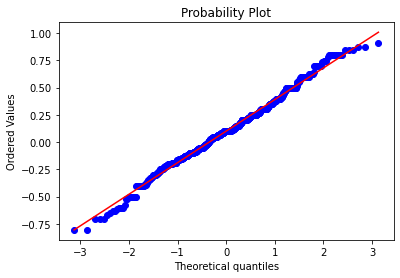

In [40]:
check_distribution(m_f_sample)

<b>Normality assumption check for distribution of male sentences</b>

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.2024853654457141
The mean is: 0.10679833874894455
The std is: 0.28405868432783965
So, data follow a normal distribution.


(0.10679833874894455, 0.28405868432783965)

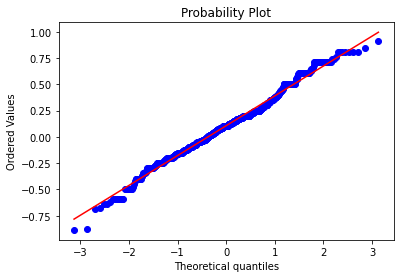

In [41]:
check_distribution(m_m_sample)

----

<b><u>Homogeneity of variances</u></b>

In [42]:
t_test_independent(m_f_sample, m_m_sample)

According to a T-Test for independent samples we can not reject the null hypothesis, in fact:
The p-value is: 0.9396360361034409
The two means (0.10322868880206643 0.10436553792359261) do not differ in a significant way.


Ttest_indResult(statistic=-0.07573925187390607, pvalue=0.9396360361034409)

--------

#### 2.3) Emotion extraction

Finally, we can move on, as we have done above, into seeing the emotions related data that have been extracted from this corpus.

In [43]:
for url in tqdm(m_authors_texts):
    m_emotions = emotion_frequencies(url, m_emotions)
del m_emotions["anticip"]
#This dataframe is useful to plot a violin visualization of the scores
m_df_plt = pd.DataFrame(m_emotions)
# DF for basic visualization of means
m_emo_scores = list()
for emo in m_emotions:
    m_emotions[emo] = np.mean(m_emotions[emo])
    m_emo_scores.append(m_emotions[emo])
m_emotions_df = pd.DataFrame({
    'emotions':pd.Series(m_emotions.keys()),
    'score':pd.Series(m_emo_scores)
})
m_emotions_df

100%|██████████| 36/36 [00:41<00:00,  1.14s/it]


,emotions,score
0,fear,0.084102
1,anger,0.061663
2,trust,0.124608
3,surprise,0.056416
4,positive,0.206865
5,negative,0.149498
6,sadness,0.075955
7,disgust,0.041581
8,joy,0.089448
9,anticipation,0.109864


#### 2.4) Common words extraction

In [44]:
m_common_words=set([w for w in sorted (m_word_freq['female'],key=m_word_freq['female'].get,reverse=True)[:1000]]+
                    [w for w in sorted (m_word_freq['male'],key=m_word_freq['male'].get,reverse=True)[:1000]])
m_common_words=list(m_common_words-male_words-female_words-m_characters-animals_list-common_ws_list)

In [45]:
m_tagged_words = {}
for word in pos_tagging(m_common_words, True):
    if word[1] not in m_tagged_words:
        m_tagged_words[word[1]] = []
    m_tagged_words[word[1]].append(word[0])

In [46]:
m_male_percent = { word :
     (m_word_freq['male'].get(word,0)/m_word_counter['male'])/ 
     (m_word_freq['female'].get(word,0)/m_word_counter['female'] + 
      m_word_freq['male'].get(word,0)/m_word_counter['male']) 
    for word in m_common_words if word in m_tagged_words["NOUN"] or word in m_tagged_words["VERB"] or word in m_tagged_words["ADJ"]}

<b><u>Female related common words in male authors corpus</u></b>

In [47]:
print('COMMON WORDS')
print('Female words in the male author corpus')
m_fcdf = common_words_df(m_word_freq, m_male_percent, m_female_general, False)
m_female_related_words = m_fcdf['word'].values.tolist()
m_fcdf

COMMON WORDS
Female words in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,bonnet,37.23,44,5,0.9738,0.0262
1,nurse,10.52,92,37,0.9132,0.0868
2,mill,7.99,85,45,0.8888,0.1112
3,needle,7.86,39,21,0.8871,0.1129
4,wise,6.84,181,112,0.8724,0.1276
5,darling,6.70,38,24,0.8701,0.1299
6,strawberry,5.96,31,22,0.8563,0.1437
7,thread,5.90,60,43,0.8551,0.1449
8,frigate,5.74,38,28,0.8517,0.1483
9,kissed,5.59,37,28,0.8483,0.1517


In [ ]:
m_fcdf.to_csv("assets/Visualizations datasets/Common words/pre_mf.csv")

<b><u>Male related common words in male authors corpus</u></b>

In [48]:
print('COMMON WORDS')
print('Male words in the male author corpus')
m_mcdf = common_words_df(m_word_freq, m_male_percent, m_male_general, True)
m_male_related_words = m_mcdf['word'].values.tolist()
m_mcdf

COMMON WORDS
Male words in the male author corpus


,word,ratio,f_corpus raw count,m_corpus raw count,f_corpus percentage,m_corpus percentage
0,study,9.73,6,247,0.0932,0.9068
1,comrade,9.41,5,199,0.0961,0.9039
2,pistol,8.80,4,149,0.1020,0.8980
3,pipe,7.44,11,346,0.1186,0.8814
4,hero,5.75,12,292,0.1481,0.8519
5,fight,5.12,12,260,0.1634,0.8366
6,guide,4.82,8,163,0.1719,0.8281
7,success,4.73,7,140,0.1746,0.8254
8,coat,4.34,11,202,0.1872,0.8128
9,shout,4.02,10,170,0.1993,0.8007


In [ ]:
m_mcdf.to_csv("assets/Visualizations datasets/Common words/pre_mm.csv")

---------

### 3) Comparative analysis of corpora

The purpose of this sub-section is one of the most important of this project.</br></br>
We will compute the differences between gendered sentences, in particular <i>we are looking to see wether is it possible to find differences between the way in which male and female authors write about male and female sentences</i>.</br></br>
Later on, we will also compare the different emotional values extracted from the previous analysis.

----

<b><u>Samples</u></b>

In [49]:
# m_m + f_m
m_m_population = {
    "scores":m_m_scores,
    "labels":m_m_labels
}
f_m_population = {
    "scores":f_m_scores,
    "labels":f_m_labels
}

# m_f + f_f
m_f_population = {
    "scores":m_f_scores,
    "labels":m_f_labels
}
f_f_population = {
    "scores":f_f_scores,
    "labels":f_f_labels
}

<b><u>Female sentences</u></b>

In [50]:
samples = stratified_random_sampling([f_f_population,m_f_population], sample_size(len(f_f_population['scores'])+len(m_f_population['scores'])))
f_f_sample = samples[0]
m_f_sample = samples[1]

In [51]:
pre_df = pd.concat([pre_df,DataFrame({"ff_comparative_sample":f_f_sample})], axis=1)
pre_df = pd.concat([pre_df,DataFrame({"mf_comparative_sample":m_f_sample})], axis=1)

<b><u>Male sentences</u></b>

In [52]:
samples = stratified_random_sampling([f_m_population,m_m_population], sample_size(len(f_m_population['scores'])+len(m_m_population['scores'])))
f_m_sample = samples[0]
m_m_sample = samples[1]

In [53]:
pre_df = pd.concat([pre_df,DataFrame({"fm_comparative_sample":f_m_sample})], axis=1)
pre_df = pd.concat([pre_df,DataFrame({"mm_comparative_sample":m_m_sample})], axis=1)

----

<b><u>Distributions</u></b>

<b>Male sentences</b>

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.8592010398666847
The mean is: 0.1149975228163501
The std is: 0.2878223048143209
So, data follow a normal distribution.


(0.1149975228163501, 0.2878223048143209)

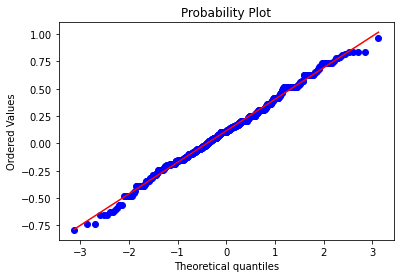

In [54]:
check_distribution(f_m_sample)

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.06167561588752101
The mean is: 0.09750143260965834
The std is: 0.271891203392202
So, data follow a normal distribution.


(0.09750143260965834, 0.271891203392202)

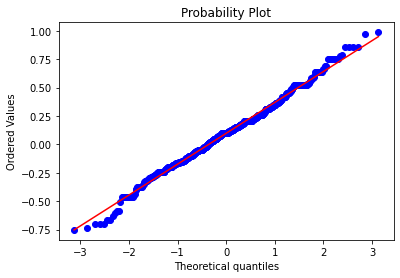

In [55]:
check_distribution(m_m_sample)

<b>Female sentences</b>

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.7200097871795716
The mean is: 0.09688624878439919
The std is: 0.291680854713213
So, data follow a normal distribution.


(0.09688624878439919, 0.291680854713213)

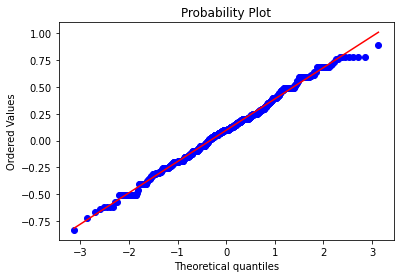

In [56]:
check_distribution(f_f_sample)

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.7213019569831784
The mean is: 0.10435232869222136
The std is: 0.2948319190304366
So, data follow a normal distribution.


(0.10435232869222136, 0.2948319190304366)

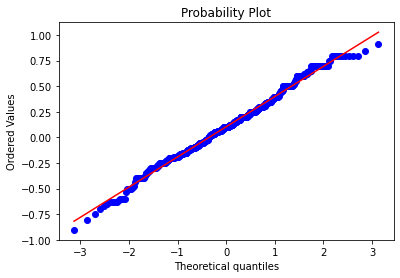

In [57]:
check_distribution(m_f_sample)

------

<b><u>f-test</u></b>

<b>Male sentences</b>

In [58]:
f_test(f_m_sample, m_m_sample)

According to an F-test, we cannot reject the null hypothesis, in fact:
The F-statistics is: 1.1206205423929139
The p-value is: 0.05533088807750175
The two variances do not differ in a significant way


(1.1206205423929139, 0.05533088807750175)

<b>Female sentences</b>

In [59]:
f_test(f_f_sample, m_f_sample)

According to an F-test, we cannot reject the null hypothesis, in fact:
The F-statistics is: 1.0217229546240918
The p-value is: 0.38120061570695385
The two variances do not differ in a significant way


(1.0217229546240918, 0.38120061570695385)

-----

<b><u>t-test</u></b>

<b>Male sentences</b>

In [60]:
t_test_independent(f_m_sample, m_m_sample)

According to a T-Test for independent samples we can not reject the null hypothesis, in fact:
The p-value is: 0.19681452613085557
The two means (0.11340652951739731 0.09385464348154277) do not differ in a significant way.


Ttest_indResult(statistic=1.2912244022165533, pvalue=0.19681452613085557)

<b>Female sentences</b>

In [61]:
t_test_independent(f_f_sample, m_f_sample)

According to a T-Test for independent samples we can not reject the null hypothesis, in fact:
The p-value is: 0.5411700272040305
The two means (0.0992121361318906 0.10858386148105645) do not differ in a significant way.


Ttest_indResult(statistic=-0.6111759758466264, pvalue=0.5411700272040305)

------

#### 3.2) Emotion comparison

In [62]:
dict_df = {
    "emotion": [],
    "female_scores":[],
    "male_scores":[]
}
emotion = []
f_auth = []
m_auth = []

for emo in f_emotions:
    dict_df["emotion"].append(emo)
    dict_df["female_scores"].append(f_emotions[emo])
    dict_df["male_scores"].append(m_emotions[emo])
    emotion.append(emo)
    f_auth.append(f_emotions[emo])
    m_auth.append(m_emotions[emo])


emotions_df = pd.DataFrame(dict_df)
emotions_df.to_csv("assets/Visualizations datasets/Emotion scores/pre_emotions.csv", index=False)

-----

### 4) Gender analytics

In this last chapter, we will try to see wether a difference can be find in the way in which "society" represents male and female.</br>
To accomplish this aim, we will join female and male authors views with respect to females and males. We will compute a comparison between the entirety of female sentences and the entirety of male sentences, without the need to look at the gender of the author.

----

<b><u>Samples</b></u>

Now, we join together the different results of the previous analysis.

In [63]:
# Female sentences population dictionary
m_f_scores.extend(f_f_scores)
f_scores = m_f_scores
m_f_labels.extend(f_f_labels)
f_labels = m_f_labels

f_population = {
    "scores":f_scores,
    "labels":f_labels
}

# Male sentences population dictionary
m_m_scores.extend(f_m_scores)
m_scores = m_m_scores
m_m_labels.extend(f_m_labels)
m_labels = m_m_labels

m_population = {
    "scores":m_scores,
    "labels":m_labels
} 

We produce two samples, one representing female gendered sentences, and the other representing male gendered sentences.

In [64]:
samples = stratified_random_sampling([f_population,m_population], sample_size(len(f_population['scores'])+len(m_population['scores'])))
f_sample = samples[0]
m_sample = samples[1]

In [65]:
pre_df

,ff_sample,fm_sample,mf_sample,mm_sample,ff_comparative_sample,mf_comparative_sample,fm_comparative_sample,mm_comparative_sample
0,-0.200000,-0.041667,-0.187500,-0.250000,-0.187500,-0.900000,-1.000000,-0.066667
1,-0.218750,-0.132917,-0.517500,-0.400000,-0.018519,-0.028819,-0.041667,-0.216667
2,-0.195833,-0.312500,-0.121875,-0.400000,-0.046528,-0.175000,-0.500000,-0.250000
3,-1.000000,-0.020833,-0.095833,-0.200000,-0.012500,-0.250000,-0.475000,-0.025000
4,-0.234375,-0.093750,-0.366667,-0.093132,-0.025000,-0.062500,-0.100000,-0.142857
...,...,...,...,...,...,...,...,...
795,0.612500,0.006250,0.625000,0.733333,0.193056,0.100000,0.137500,0.382500
796,0.300000,0.132041,0.150000,0.008333,0.133333,0.333333,0.006250,0.139141
797,0.590000,0.050000,0.100000,0.200000,0.050000,0.050000,0.100000,0.050000
798,0.133333,0.335417,0.103125,0.100000,0.200000,0.120833,0.550000,0.250000


In [66]:
pre_df = pd.concat([pre_df,DataFrame({"f_gender_sample":f_sample})], axis=1)
pre_df = pd.concat([pre_df,DataFrame({"m_gender_sample":m_sample})], axis=1)

----

<b><u>Distributions</u></b>

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.9542936862648292
The mean is: 0.10520877944780903
The std is: 0.2958604078189079
So, data follow a normal distribution.


(0.10520877944780903, 0.2958604078189079)

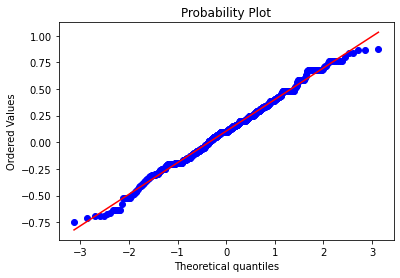

In [67]:
check_distribution(f_sample)

According to a D'Agostino-Pearson normality test, we cannot reject the null hypothesis, in fact:
The p-value is: 0.43752781802236007
The mean is: 0.11339452054578937
The std is: 0.29571354171671616
So, data follow a normal distribution.


(0.11339452054578937, 0.29571354171671616)

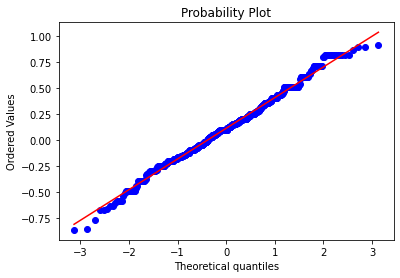

In [68]:
check_distribution(m_sample)

------

<b><u>f-test</u></b>

In [69]:
f_test(f_sample, m_sample)

According to an F-test, we cannot reject the null hypothesis, in fact:
The F-statistics is: 1.0009935464697133
The p-value is: 0.4944231101720299
The two variances do not differ in a significant way


(1.0009935464697133, 0.4944231101720299)

----

<b><u>t-test</u></b>

In [70]:
t_test_independent(f_sample, m_sample)

According to a T-Test for independent samples we can not reject the null hypothesis, in fact:
The p-value is: 0.8608563376696835
The two means (0.11292805948295531 0.11564190556618756) do not differ in a significant way.


Ttest_indResult(statistic=-0.17531246821458904, pvalue=0.8608563376696835)

Finally, we store our df into a CSV file.

In [71]:
pre_df.to_csv("assets/Visualizations datasets/Sentiment scores/pre_df.csv", index=False)